<a href="https://colab.research.google.com/github/luizdaviDL/Customer-Shopping-EDA-and-Data-Cleaning-Preprocessing/blob/main/HandsOn_01/Customer_Shopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
import pandas as pd
import numpy as np

# Carregar CSV existente
df = pd.read_csv('shopping_trends.csv')
n_existente = len(df)

# Adicionar 200 novas linhas
np.random.seed(42)

for i in range(200):
    # Criar linha base
    nova_linha = {
        'Customer ID': n_existente + i + 1,
        'Age': np.random.choice([20, 25, 30, 35, 40, 45, 50, 55, 60, '']),
        'Gender': np.random.choice(['Male', 'Female', '']),
        'Item Purchased': np.random.choice(['Blouse', 'Sweater', 'Dress', 'T-shirt', 'Jeans', '']),
        'Category': 'Clothing',
        'Purchase Amount (USD)': np.random.choice([50, 75, 100, 150, 200, 500, 1000, 5000, '']),
        'Location': np.random.choice(['NY', 'CA', 'TX', 'FL', '']),
        'Size': np.random.choice(['S', 'M', 'L', 'XL', '']),
        'Color': np.random.choice(['Black', 'White', 'Red', '']),
        'Season': np.random.choice(['Winter', 'Spring', '']),
        'Review Rating': np.random.choice([3.5, 4.0, 4.5, 5.0, '']),
        'Subscription Status': np.random.choice(['Yes', 'No', '']),
        'Payment Method': np.random.choice(['Credit Card', 'PayPal', '']),
        'Shipping Type': np.random.choice(['Standard', 'Express', '']),
        'Discount Applied': np.random.choice(['Yes', 'No', '']),
        'Promo Code Used': np.random.choice(['Yes', 'No', '']),
        'Previous Purchases': np.random.choice([5, 10, 15, 20, '']),
        'Preferred Payment Method': np.random.choice(['Credit Card', 'PayPal', '']),
        'Frequency of Purchases': np.random.choice(['Weekly', 'Monthly', ''])
    }

    # 30% chance de linha duplicada (exceto ID)
    if np.random.random() < 0.3 and i > 0:
        # Duplicar linha anterior (mas com ID diferente)
        ultima_linha = df.iloc[-1].copy()
        ultima_linha['Customer ID'] = n_existente + i + 1
        df = pd.concat([df, pd.DataFrame([ultima_linha])], ignore_index=True)
    else:
        df = pd.concat([df, pd.DataFrame([nova_linha])], ignore_index=True)

# Salvar
df.to_csv('seu_arquivo_completo.csv', index=False)



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
data = pd.read_csv('shopping_trends.csv')

In [ ]:
#treating values with filnna values onde dataset
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Age'].fillna(data['Age'].mean(), inplace=True)

data['Purchase Amount (USD)'] = pd.to_numeric(data['Purchase Amount (USD)'], errors='coerce')
data['Purchase Amount (USD)'].fillna(data['Purchase Amount (USD)'].mean(), inplace=True)

data['Previous Purchases'] = pd.to_numeric(data['Previous Purchases'], errors='coerce')
data['Previous Purchases'].fillna(data['Previous Purchases'].mean(), inplace=True)

data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Location'].fillna(data['Location'].mode()[0], inplace=True)
data['Item Purchased'].fillna(data['Item Purchased'].mode()[0], inplace=True)
data['Size'].fillna(data['Size'].mode()[0], inplace=True)
data['Color'].fillna(data['Color'].mode()[0], inplace=True)
data['Season'].fillna(data['Season'].mode()[0], inplace=True)
data['Review Rating'].fillna(data['Review Rating'].mode()[0], inplace=True)
data['Subscription Status'].fillna(data['Subscription Status'].mode()[0], inplace=True)
data['Payment Method'].fillna(data['Payment Method'].mode()[0], inplace=True)
data['Shipping Type'].fillna(data['Shipping Type'].mode()[0], inplace=True)
data['Discount Applied'].fillna(data['Discount Applied'].mode()[0], inplace=True)
data['Promo Code Used'].fillna(data['Promo Code Used'].mode()[0], inplace=True)
data['Previous Purchases'].fillna(data['Previous Purchases'].mode()[0], inplace=True)
data['Preferred Payment Method'].fillna(data['Preferred Payment Method'].mode()[0], inplace=True)
data['Frequency of Purchases'].fillna(data['Frequency of Purchases'].mode()[0], inplace=True)



/tmp/ipython-input-3401995289.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
/tmp/ipython-input-3401995289.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
# puting a flag in to Purchase Amount (USD) outliers values
limit = data['Purchase Amount (USD)'].quantile(0.99)
data['is_outlier'] = (data['Purchase Amount (USD)'] > limit).astype(int)

In [ ]:
#from here to down : analsazin data and making a exploratory analisin

In [ ]:
data[data['is_outlier'] == 1]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,is_outlier
3900,3901,50.000000,Male,Dress,Clothing,5000.0,Montana,M,Red,Spring,4.5,No,Credit Card,Standard,Yes,No,24.846457,PayPal,Monthly,1
3901,3902,50.000000,Male,Dress,Clothing,5000.0,Montana,M,Red,Spring,4.5,No,Credit Card,Standard,Yes,No,24.846457,PayPal,Monthly,1
3905,3906,55.000000,Male,T-shirt,Clothing,5000.0,TX,L,Black,Spring,4.5,Yes,Credit Card,Standard,No,No,10.000000,Credit Card,Monthly,1
3906,3907,25.000000,Male,Blouse,Clothing,5000.0,Montana,L,Black,Spring,4.5,No,Credit Card,Standard,Yes,No,15.000000,Credit Card,Weekly,1
3907,3908,25.000000,Male,Blouse,Clothing,5000.0,Montana,L,Black,Spring,4.5,No,Credit Card,Standard,Yes,No,15.000000,Credit Card,Weekly,1
3913,3914,60.000000,Male,Sweater,Clothing,1000.0,CA,L,Red,Spring,3.5,Yes,PayPal,Standard,No,Yes,24.846457,PayPal,Monthly,1
3914,3915,60.000000,Male,Sweater,Clothing,1000.0,CA,L,Red,Spring,3.5,Yes,PayPal,Standard,No,Yes,24.846457,PayPal,Monthly,1
3931,3932,43.847304,Male,Dress,Clothing,1000.0,Montana,L,Red,Spring,5.0,Yes,PayPal,Express,Yes,Yes,24.846457,PayPal,Weekly,1
3948,3949,50.000000,Male,T-shirt,Clothing,1000.0,NY,S,Red,Spring,4.0,No,Credit Card,Standard,Yes,Yes,20.000000,PayPal,Monthly,1
3961,3962,55.000000,Male,Blouse,Clothing,1000.0,NY,M,Black,Spring,5.0,No,Credit Card,Standard,Yes,No,15.000000,PayPal,Weekly,1


In [ ]:
data.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:


data.head()
#data.isnull().sum()
#data.shape
#data.describe()

values = ['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Payment Method',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Preferred Payment Method',
 'Frequency of Purchases']

for col in values:
    print(f"\n{'='*40}")
    print(f"{col}:")
    print('-'*40)
    print(data[col].value_counts(normalize=True).round(3).head())


Gender:
----------------------------------------
Gender
Male      0.678
Female    0.322
Name: proportion, dtype: float64

Item Purchased:
----------------------------------------
Item Purchased
Blouse     0.050
Dress      0.049
Sweater    0.047
T-shirt    0.047
Jewelry    0.042
Name: proportion, dtype: float64

Category:
----------------------------------------
Category
Clothing       0.472
Accessories    0.302
Footwear       0.146
Outerwear      0.079
Name: proportion, dtype: float64

Location:
----------------------------------------
Location
Montana       0.024
California    0.023
Idaho         0.023
Illinois      0.023
Alabama       0.022
Name: proportion, dtype: float64

Size:
----------------------------------------
Size
M     0.440
L     0.270
S     0.173
XL    0.118
Name: proportion, dtype: float64

Color:
----------------------------------------
Color
Black     0.054
Red       0.049
White     0.045
Olive     0.044
Yellow    0.043
Name: proportion, dtype: float64

Season:
----

In [ ]:
data.describe()

,Age,Purchase Amount (USD),Previous Purchases
count,4100.000000,4100.000000,4100.000000
mean,43.890702,87.411425,24.935796
std,15.084837,324.019732,14.298787
min,18.000000,20.000000,1.000000
25%,31.000000,40.000000,13.000000
50%,43.890702,62.000000,24.935796
75%,57.000000,83.000000,37.000000
max,70.000000,5000.000000,50.000000


In [ ]:
Q1 = data['Purchase Amount (USD)'].quantile(0.25)
Q3 = data['Purchase Amount (USD)'].quantile(0.75)
IQR = Q3 - Q1
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

data[(data['Purchase Amount (USD)'] < limite_inf) | (data['Purchase Amount (USD)'] > limite_sup)]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3900,3901,50.000000,Male,Dress,Clothing,5000.0,Montana,M,Red,Spring,4.5,No,Credit Card,Standard,Yes,No,24.846457,PayPal,Monthly
3901,3902,50.000000,Male,Dress,Clothing,5000.0,Montana,M,Red,Spring,4.5,No,Credit Card,Standard,Yes,No,24.846457,PayPal,Monthly
3905,3906,55.000000,Male,T-shirt,Clothing,5000.0,TX,L,Black,Spring,4.5,Yes,Credit Card,Standard,No,No,10.000000,Credit Card,Monthly
3906,3907,25.000000,Male,Blouse,Clothing,5000.0,Montana,L,Black,Spring,4.5,No,Credit Card,Standard,Yes,No,15.000000,Credit Card,Weekly
3907,3908,25.000000,Male,Blouse,Clothing,5000.0,Montana,L,Black,Spring,4.5,No,Credit Card,Standard,Yes,No,15.000000,Credit Card,Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093,4094,60.000000,Female,Sweater,Clothing,500.0,NY,L,Red,Spring,5.0,No,Credit Card,Standard,No,No,15.000000,Credit Card,Monthly
4095,4096,20.000000,Male,Blouse,Clothing,1000.0,TX,S,Black,Winter,4.0,Yes,Credit Card,Standard,Yes,Yes,20.000000,Credit Card,Monthly
4096,4097,20.000000,Male,Blouse,Clothing,1000.0,TX,S,Black,Winter,4.0,Yes,Credit Card,Standard,Yes,Yes,20.000000,Credit Card,Monthly
4097,4098,55.000000,Male,Sweater,Clothing,500.0,FL,M,White,Spring,4.0,No,Credit Card,Express,No,No,15.000000,PayPal,Weekly


In [ ]:
limite = data['Purchase Amount (USD)'].quantile(0.99)

data[(data['Purchase Amount (USD)'] > limite) ]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3900,3901,50.000000,Male,Dress,Clothing,5000.0,Montana,M,Red,Spring,4.5,No,Credit Card,Standard,Yes,No,24.846457,PayPal,Monthly
3901,3902,50.000000,Male,Dress,Clothing,5000.0,Montana,M,Red,Spring,4.5,No,Credit Card,Standard,Yes,No,24.846457,PayPal,Monthly
3905,3906,55.000000,Male,T-shirt,Clothing,5000.0,TX,L,Black,Spring,4.5,Yes,Credit Card,Standard,No,No,10.000000,Credit Card,Monthly
3906,3907,25.000000,Male,Blouse,Clothing,5000.0,Montana,L,Black,Spring,4.5,No,Credit Card,Standard,Yes,No,15.000000,Credit Card,Weekly
3907,3908,25.000000,Male,Blouse,Clothing,5000.0,Montana,L,Black,Spring,4.5,No,Credit Card,Standard,Yes,No,15.000000,Credit Card,Weekly
3913,3914,60.000000,Male,Sweater,Clothing,1000.0,CA,L,Red,Spring,3.5,Yes,PayPal,Standard,No,Yes,24.846457,PayPal,Monthly
3914,3915,60.000000,Male,Sweater,Clothing,1000.0,CA,L,Red,Spring,3.5,Yes,PayPal,Standard,No,Yes,24.846457,PayPal,Monthly
3931,3932,43.847304,Male,Dress,Clothing,1000.0,Montana,L,Red,Spring,5.0,Yes,PayPal,Express,Yes,Yes,24.846457,PayPal,Weekly
3948,3949,50.000000,Male,T-shirt,Clothing,1000.0,NY,S,Red,Spring,4.0,No,Credit Card,Standard,Yes,Yes,20.000000,PayPal,Monthly
3961,3962,55.000000,Male,Blouse,Clothing,1000.0,NY,M,Black,Spring,5.0,No,Credit Card,Standard,Yes,No,15.000000,PayPal,Weekly


In [ ]:
np.unique(data['Category'])

array(['Accessories', 'Clothing', 'Footwear', 'Outerwear'], dtype=object)

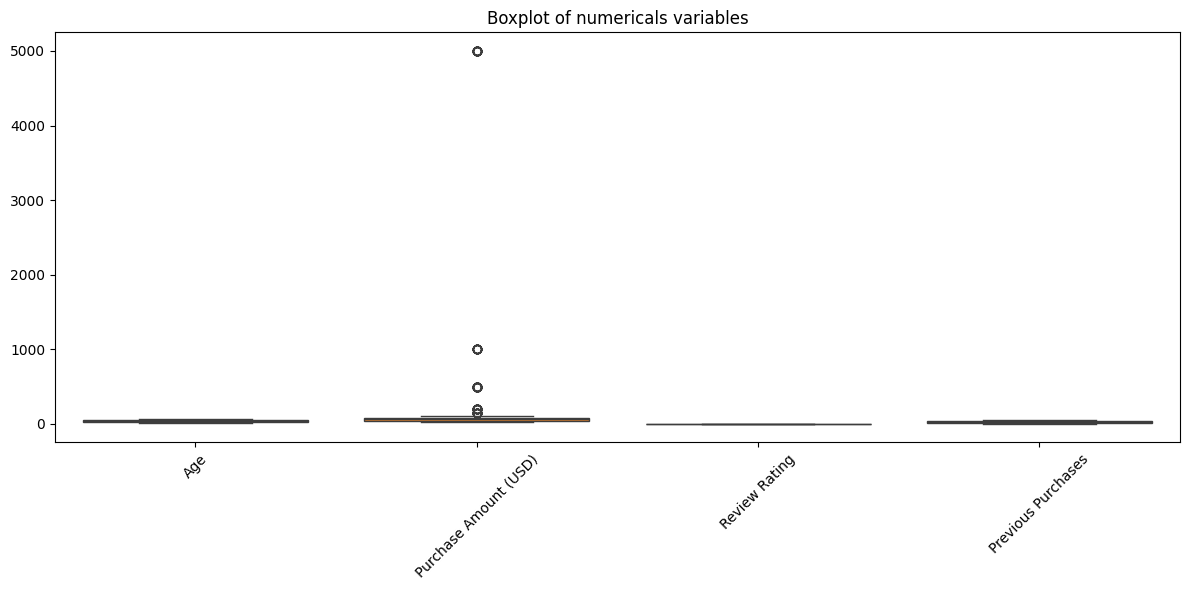

In [ ]:
# @title
var = [
 'Age',
 'Purchase Amount (USD)',
 'Review Rating',
 'Previous Purchases']

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[var])
plt.title('Boxplot of numericals variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
'''
objetiv: help businesses to aiming and alight their strategies and  make informed decisions trow the data analises and tailor they products, with behavier customers data, figure out what the customers are building and what they prefer mpst

1. wich products customers are buying the most,by category
2. by this category that are most sale, what products are including
3. the age of the customers that are buying the best-salling products

'''

<Axes: title={'center': 'wich products customers are buying the most by category'}, xlabel='Category'>

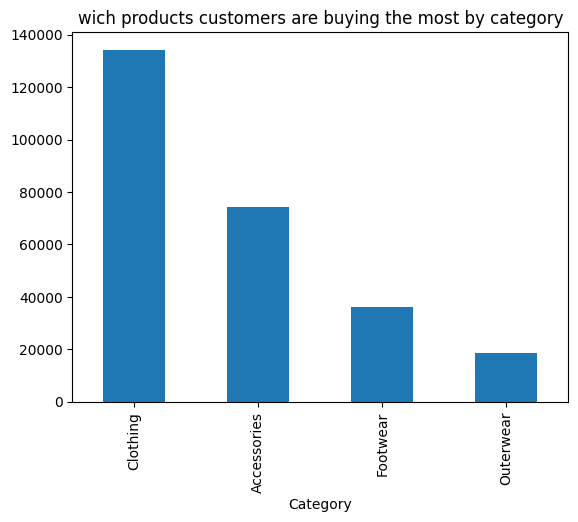

In [ ]:
#analizin wich products customers are buying the most,by category

# Filter just not outliers
normal_data = data[data['is_outlier'] == 0]

# Agora plotar
top_categorias = normal_data.groupby('Category')['Purchase Amount (USD)'].sum().nlargest(5)
top_categorias.plot(kind='bar', title=f'wich products customers are buying the most by category')

<Axes: title={'center': 'what products are including by the category that are most sale'}, xlabel='Item Purchased'>

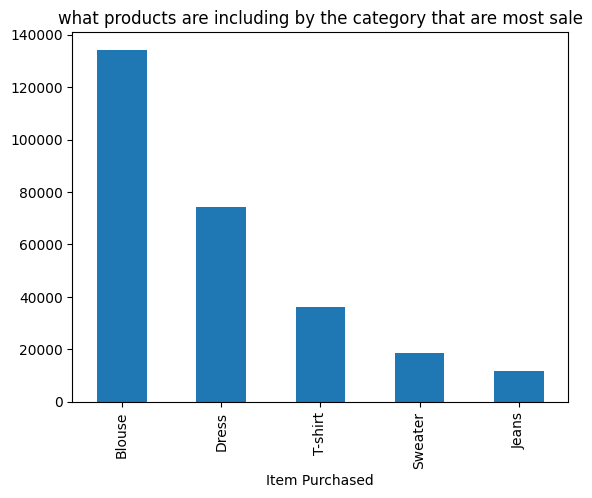

In [ ]:
#analizin by this category that are most sale, what products are including


# Filter only non-outliers
df_normal = data[data['is_outlier'] == 0]

# For category analysis
top_categories = df_normal.groupby('Category')['Purchase Amount (USD)'].sum().nlargest(5)
top_categories.plot(kind='bar')

# For specific category product analysis
top_cat = 'Clothing'
df_filtered = data[(data['Category'] == top_cat) & (data['is_outlier'] == 0)]
df_filtered.groupby('Item Purchased')['Purchase Amount (USD)'].sum().nlargest(5).plot(kind='bar', title=f'what products are including by the category that are most sale')

<Axes: title={'center': 'Top Products in Accessories '}, xlabel='Item Purchased'>

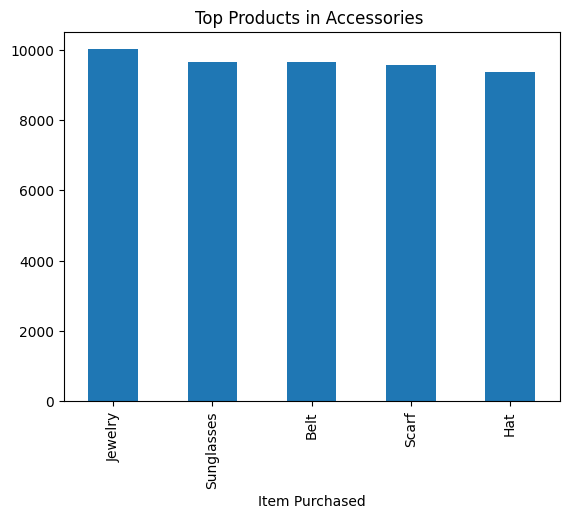

In [ ]:
#analizin by this category that are most sale, what products are including

# Filter top category and show top products (non-outliers only)
top_cat = 'Accessories'
df_filtered = data[(data['Category'] == top_cat) & (data['is_outlier'] == 0)]

# Group and plot
top_products = df_filtered.groupby('Item Purchased')['Purchase Amount (USD)'].sum().nlargest(5)
top_products.plot(kind='bar', title=f'Top Products in {top_cat} ')

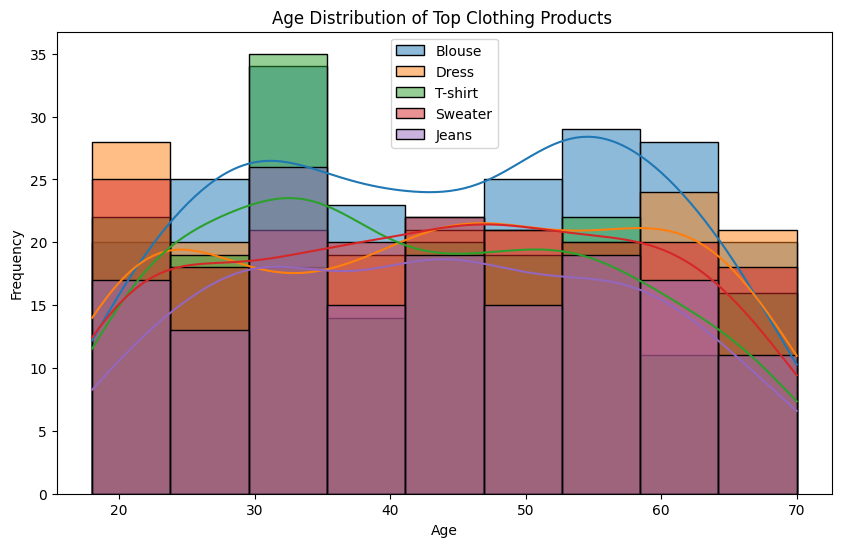

In [ ]:
#analizin by the age of the customers that are buying the best-salling products


top_products = data[(data['Category'] == 'Clothing') & (data['is_outlier'] == 0)]\
    .groupby('Item Purchased')['Purchase Amount (USD)'].sum().nlargest(5).index

# Plot age distribution for each top product
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for product in top_products:
    product_data = data[(data['Item Purchased'] == product) & (data['is_outlier'] == 0)]
    sns.histplot(product_data['Age'], kde=True, label=product, alpha=0.5)

plt.title('Age Distribution of Top Clothing Products ')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

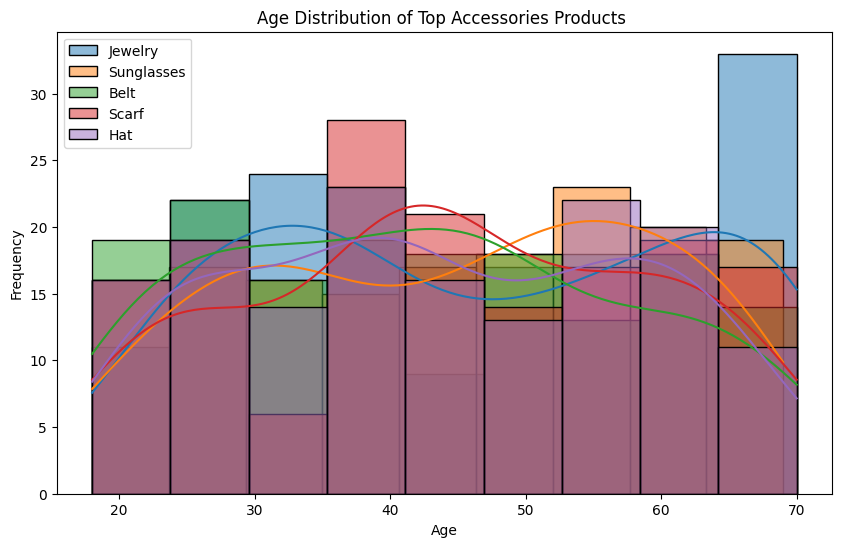

In [ ]:


top_products = data[(data['Category'] == 'Accessories') & (data['is_outlier'] == 0)]\
    .groupby('Item Purchased')['Purchase Amount (USD)'].sum().nlargest(5).index

# Plot age distribution for each top product
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for product in top_products:
    product_data = data[(data['Item Purchased'] == product) & (data['is_outlier'] == 0)]
    sns.histplot(product_data['Age'], kde=True, label=product, alpha=0.5)

plt.title('Age Distribution of Top Accessories Products ')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()